## Mnist dataset inspection and transformation

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

import tensorflow as tf

from sklearn.metrics import roc_curve, roc_auc_score, auc, jaccard_score

### Training

In [2]:
data = idx2numpy.convert_from_file('data/train-images.idx3-ubyte')

In [3]:
data.shape

(60000, 28, 28)

In [20]:
train_labels = idx2numpy.convert_from_file('data/train-labels.idx1-ubyte')

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
Y_train = pd.get_dummies(train_labels).to_numpy()
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

### Test data

In [52]:
X_test = idx2numpy.convert_from_file('data/t10k-images.idx3-ubyte')

In [53]:
X_test.shape

(10000, 28, 28)

In [82]:
test_labels = idx2numpy.convert_from_file('data/t10k-labels.idx1-ubyte')

In [83]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [57]:
Y_test = pd.get_dummies(labels).to_numpy()
Y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Model

In [47]:
def get_model():
    
    inputs = tf.keras.Input(shape=(28, 28,1))
    x = tf.keras.layers.Conv2D(2, kernel_size=(2, 2), padding="same", activation=tf.nn.relu)(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(2, kernel_size=(2, 2), padding="same", activation=tf.nn.relu)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    outputs = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

### Training

In [48]:
model = get_model()

In [49]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 2)         10        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 2)         18        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 98)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1267

In [50]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

In [51]:
model.fit(data, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 2.1926 - acc: 0.7032
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2753 - acc: 0.9172
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1816 - acc: 0.9439
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1482 - acc: 0.9524
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1200 - acc: 0.9622
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1069 - acc: 0.9642
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0955 - acc: 0.9689
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0868 - acc: 0.9717
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0749 - acc: 0.9755
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0724 - acc: 0.9757


### Evaluation

In [58]:
preds = model.predict(X_test)

In [81]:
pred_labels = np.argmax(preds, axis = 1)
y_pred = pd.get_dummies(pred_labels).to_numpy()
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [80]:
accuracy_score(Y_test, y_pred)

0.9642

### Inspection of miscalssified images

In [85]:
missed = np.argwhere(pred_labels!=test_labels)

In [121]:
def show_missed(id_list, data, max_rows = 10):
    cols = 7
    rows = id_list.shape[0]//cols
    
    rows = min(rows, max_rows)
    fig, ax = plt.subplots(rows, cols, figsize = (16,20))
    for i in range(rows):
        for j in range(cols):
            if i*rows+j > id_list.shape[0]-1: break
            ax[i,j].imshow(data[id_list[i*rows+j]][0,:,:])
    plt.show()

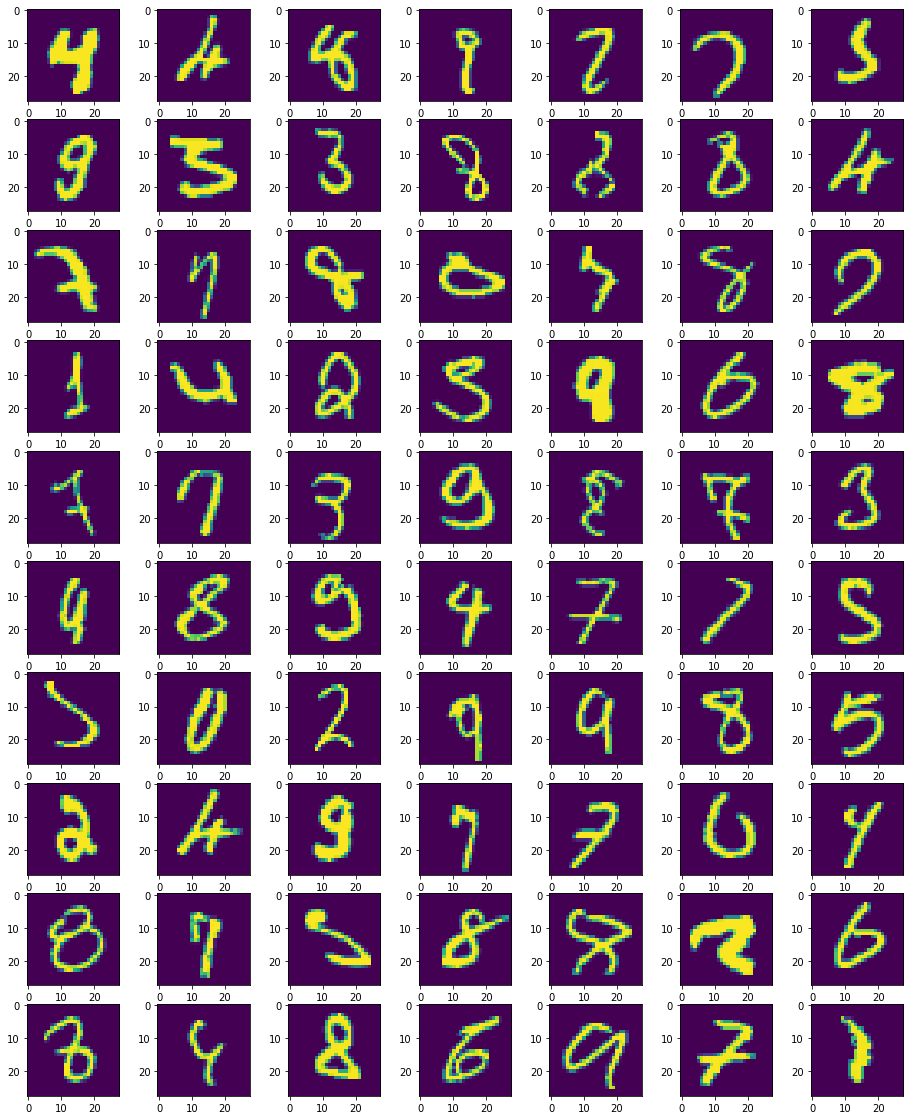

In [122]:
show_missed(missed, X_test)